In [1]:
import numpy as np
import pandas as pd

In [143]:

# List of tickers
tickers = ['^SPX']

# Define the start and end dates for the historical data
start_date = '2005-01-01'
end_date = '2013-12-31'

# Download historical data for each ticker
historical_data = yf.download(tickers, start=start_date, end=end_date)

# Print the historical data



[*********************100%***********************]  1 of 1 completed


In [145]:
historical_data[historical_data['Volume']!=0]['Adj Close'].to_csv("/Users/thebobs/Downloads/spx_2006_2013.csv")

In [147]:
p=historical_data[historical_data['Volume']!=0]['Adj Close']

In [148]:
p=np.log(p)

<AxesSubplot: xlabel='Date'>

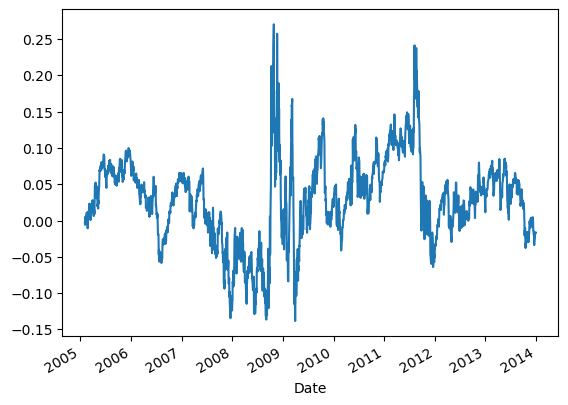

In [151]:
(np.sign(p.diff(20)).shift(1)*p.diff()).cumsum().plot()

In [97]:
import os

In [98]:
os.chdir("ReutersNews106521")

In [99]:
dt=os.listdir()[0]

In [102]:
os.listdir(dt)[0]

'us-energy-hitachi-ge-idUSTKB00256820061113'

In [131]:
news=[]
for dt in os.listdir():
    if not dt.startswith("."):
        for n in os.listdir(dt):
            try:
                with open(dt+"/"+n) as f:
                    lines=f.readlines()
                    news.append((dt,lines[0][3:-1],lines[7].strip()))
            except:
                pass

In [132]:
df_news=pd.DataFrame(news,columns=['date','title','summary'])

In [135]:
df_news.to_csv('/Users/thebobs/Downloads/reuters_news_2006_2013.csv',index=False)